In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pylab import rcParams

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)

EPOCHS_TO_TRAIN = 50001

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 12, 8

# Predicting XOR output

The [exclusive or](https://en.wikipedia.org/wiki/Exclusive_or) is a logical operation that outputs true only when inputs differ. Can we predict the output of the operation given input?

In [3]:
df = pd.DataFrame([
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
])
df.columns = ['A', 'B', 'y']

In [4]:
df

,A,B,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


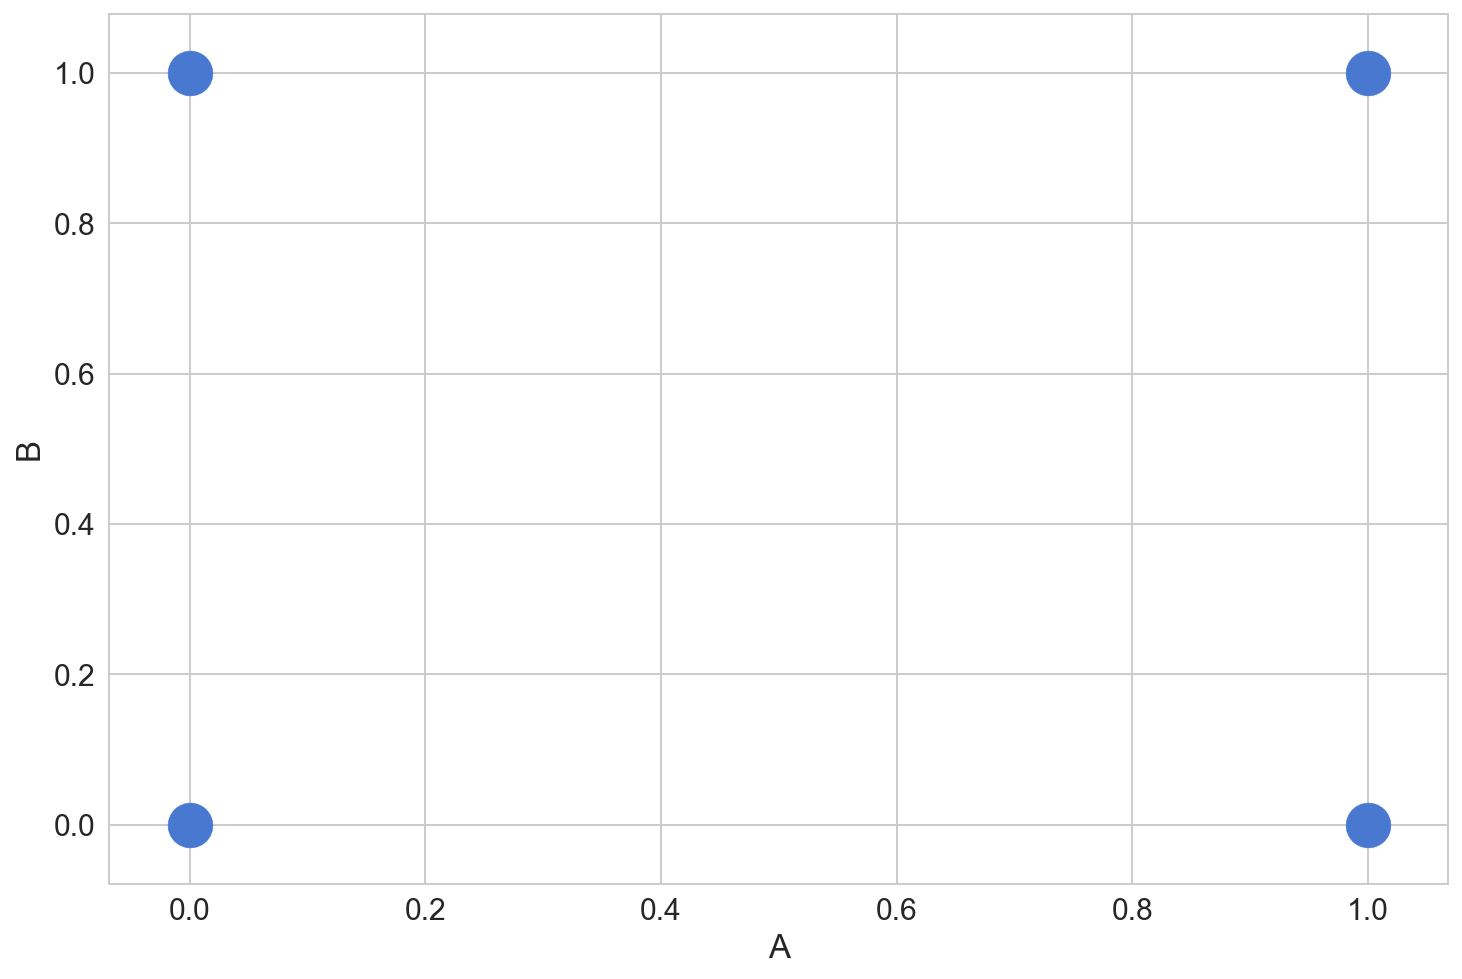

In [5]:
df.plot.scatter("A", "B", s=500);

# Modeling

In [6]:
X, y = df[["A", "B"]], df["y"]

In [7]:
X = Variable(torch.from_numpy(X.values).float(), requires_grad=False)
y = Variable(torch.from_numpy(y.values).float(), requires_grad=False)

In [8]:
def train(model, X, y):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    for idx in range(EPOCHS_TO_TRAIN):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        if idx % 5000 == 0:
            print("Epoch {: >8} Loss: {}".format(idx, loss.data.numpy()[0]))

## Linear Regression

In [9]:
class LinearRegression(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        return self.fc1(x)

In [10]:
linear_regression = LinearRegression()

train(linear_regression, X, y)

Epoch        0 Loss: 0.41956233978271484
Epoch     5000 Loss: 0.2499999701976776
Epoch    10000 Loss: 0.2499999701976776
Epoch    15000 Loss: 0.2499999701976776
Epoch    20000 Loss: 0.2499999701976776
Epoch    25000 Loss: 0.2499999701976776
Epoch    30000 Loss: 0.2499999701976776
Epoch    35000 Loss: 0.2499999701976776
Epoch    40000 Loss: 0.2499999701976776
Epoch    45000 Loss: 0.2499999701976776
Epoch    50000 Loss: 0.2499999701976776


In [11]:
def eval_model(y_pred, y):
    df = pd.DataFrame([
        y_pred.data.numpy().flatten(), 
        y.data.numpy()
    ]).transpose()
    df.columns = ["y_pred", "y"]
    return df

In [12]:
eval_model(linear_regression(X), y)

,y_pred,y
0,0.499998,0.0
1,0.499999,1.0
2,0.499999,1.0
3,0.500001,0.0


## Neural Network

In [13]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 1)

    def forward(self, x):
        x = self.fc1(x)
        return self.fc2(x)

In [14]:
net = Net()

train(net, X, y)

Epoch        0 Loss: 0.5186911225318909
Epoch     5000 Loss: 0.2499999850988388
Epoch    10000 Loss: 0.25
Epoch    15000 Loss: 0.25
Epoch    20000 Loss: 0.25
Epoch    25000 Loss: 0.25
Epoch    30000 Loss: 0.25
Epoch    35000 Loss: 0.25
Epoch    40000 Loss: 0.25
Epoch    45000 Loss: 0.25
Epoch    50000 Loss: 0.25


In [15]:
eval_model(net(X), y)

,y_pred,y
0,0.500003,0.0
1,0.499999,1.0
2,0.500002,1.0
3,0.499998,0.0


## Adding Activation

Let's try to add activation function and see how our performance changes.

### Sigmoid function

The sigmoid function is used quite commonly in the realm of deep learning, at least it was until recently. It has distinct S shape and it is a differentiable real function for any real input value. Additionally, it has a positive derivative at each point. More importantly, we will use it as an activation function for the hidden layer of our model. Here's how it is defined:

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

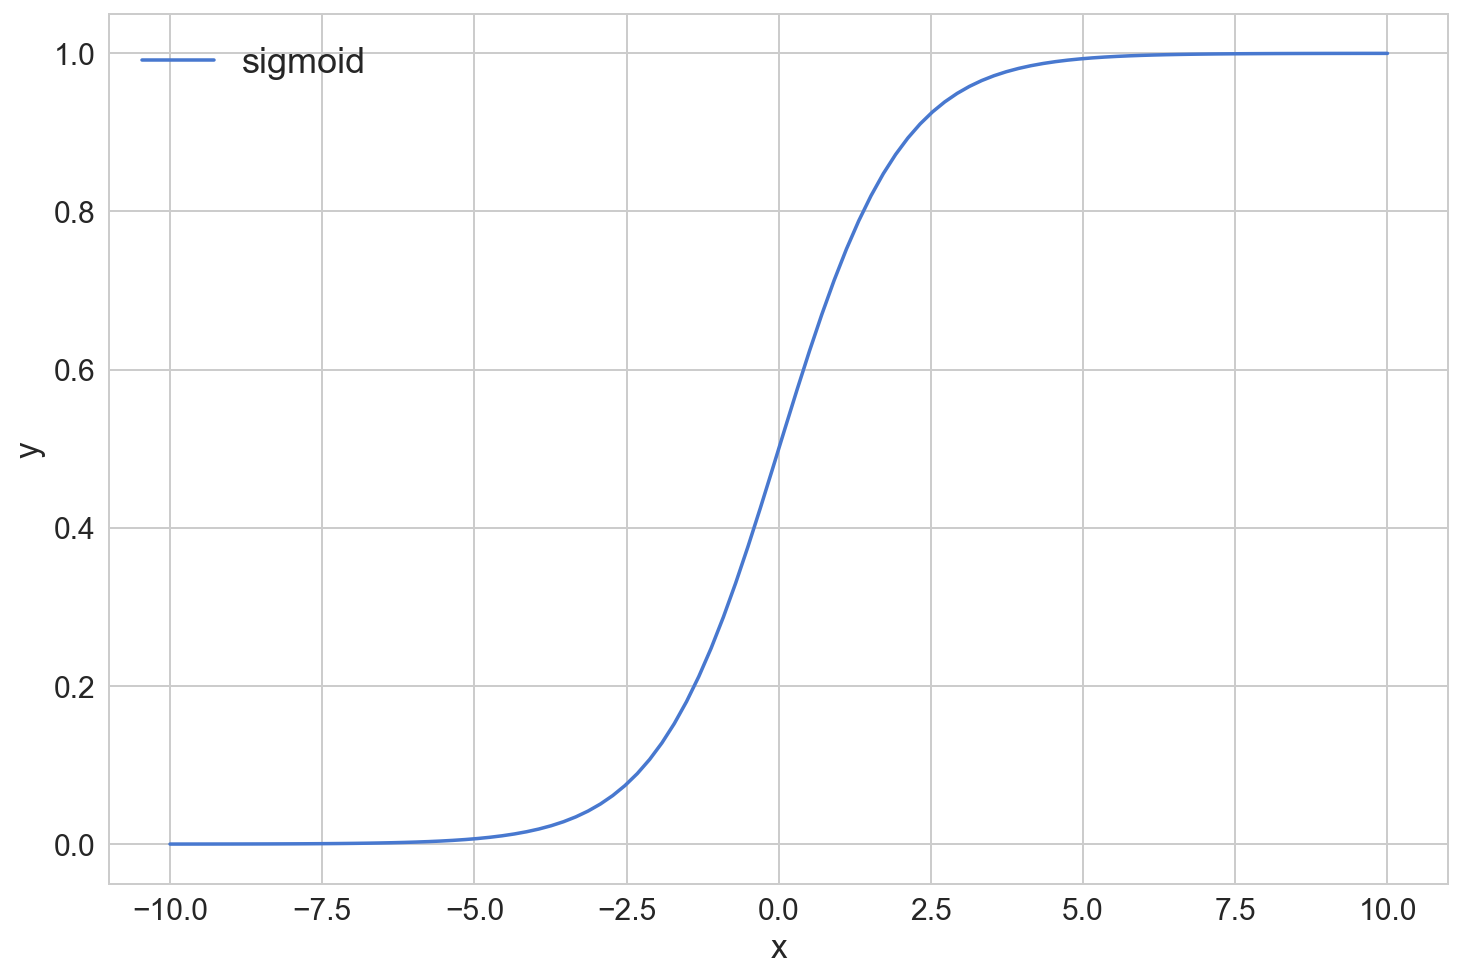

In [16]:
x = np.linspace(-10., 10., num=100)
sig = F.sigmoid(torch.from_numpy(x))
plt.plot(x, sig.numpy(), label="sigmoid")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(prop={'size' : 18})
plt.show()

### ReLu (Rectified Linear unit)

The ReLu has become very popular in the last few years. It computes the function 

$$f(x) = \max(0, x)$$

Simply put, the activation is thresholded at zero.

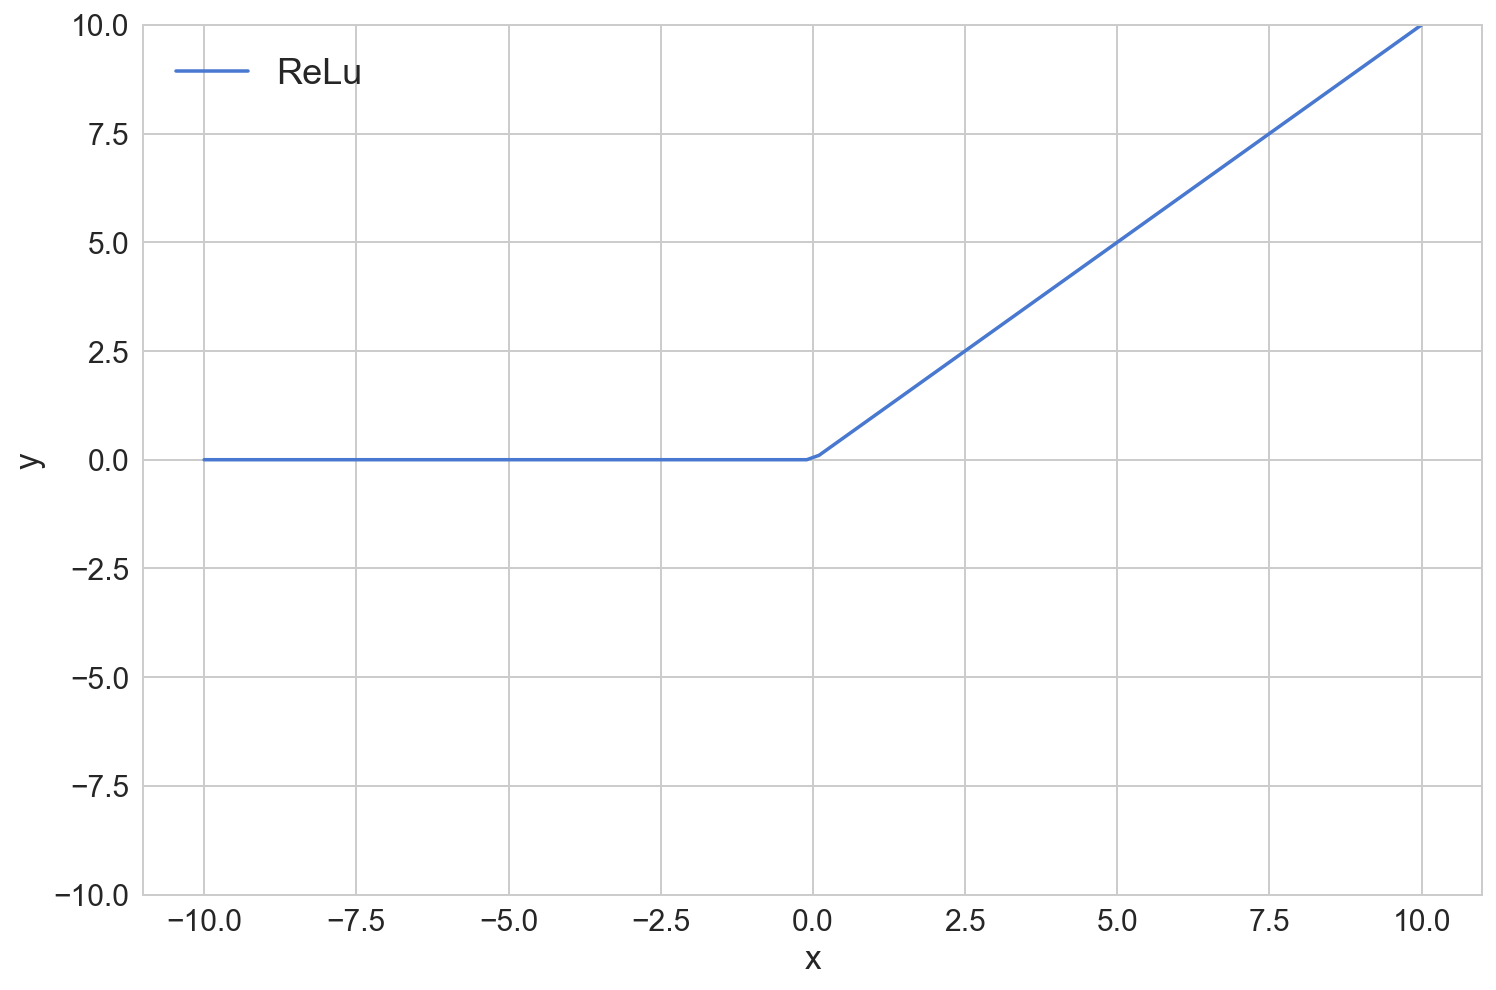

In [17]:
x = np.linspace(-10., 10., num=100)
sig = F.relu(Variable(torch.from_numpy(x)))
plt.plot(x, sig.data.numpy(), label="ReLu")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-10, 10)
plt.legend(prop={'size' : 18})
plt.show()

In [18]:
class SigmoidNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 1)

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        return self.fc2(x)

In [19]:
s_net = SigmoidNet()

train(s_net, X, y)

Epoch        0 Loss: 0.8724099397659302
Epoch     5000 Loss: 0.2497832328081131
Epoch    10000 Loss: 0.24941237270832062
Epoch    15000 Loss: 0.2482304871082306
Epoch    20000 Loss: 0.2426568865776062
Epoch    25000 Loss: 0.2126871943473816
Epoch    30000 Loss: 0.10507109761238098
Epoch    35000 Loss: 0.007202622480690479
Epoch    40000 Loss: 8.370543218916282e-05
Epoch    45000 Loss: 6.884237109261448e-07
Epoch    50000 Loss: 6.50580922467725e-09


In [20]:
eval_model(s_net(X), y)

,y_pred,y
0,0.000048,0.0
1,0.999924,1.0
2,0.999924,1.0
3,0.000110,0.0


# Why the Neural Network did so good?

The [Universal Approximation Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem) states that any feed forward neural network with a *single* hidden layer containing a finite number of units/neurons can fit any function. More specifically, we can get to any desired non-zero amount of error. We will always be able to output a prediction $g(x)$

$$|g(x) - f(x)| < \epsilon \quad \forall{x}$$ 

where $f(x)$ is the truth value and $\epsilon $ is a very small positive non-zero number.

What this means is that if, for example, you're given a set of $n$ training examples $X$ where each $x_i \in X$ is some $k$-dimensional vector and you have a set of $n$ training labels $Y$ where each $y_i \in Y$ is a label from the set {0,1} (binary classification), then you will be able to generate a neural network (with one hidden layer) that is able be trained to classify every single one of those $n$ examples correctly.